## DATA SCIENCE CAPSTONE PROJECT :

### NAME OF THE PROJECT : PREDICTING BAD LOANS (CREDIT RISK MODELING ) :
Purpose of this project is to identify the bad loans , minimize credit risk and maximize the profit of a Bank .

### Introduction :
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision

   * If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank

   * the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank

It may be assumed that the second risk is a greater risk, as the bank (or any other institution lending the money to a untrustworthy party) had a higher chance of not being paid back the borrowed amount.

So its on the part of the bank or other lending authority to evaluate the risks associated with lending money to a customer.

This study aims at addressing this problem by using the applicant’s demographic and socio-economic profiles to assess the risk of lending loan to the customer.

In business terms, we try to minimize the risk and maximize of profit for the bank. To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

Here we are going to design a Credit Risk Modelling System for our client which is one of the largest Public state owned bank in Bangladesh. More than 1000+ branches and 15 millions of accounts.and which is the largest governmen't Remittance Service provider. which contains approximately 45% of the loan account of the country. but due to some unknown reasons approximately 35% of it's loans are classified and some times goes to even writeoff due to this reason . So A good credit risk modelling system is indeed mandatory for this Bank . So our study is to develop a credit risk modelling system which can minimize the risk of Credit given to people and maximize bank profit .

Hence this study is intended to find the best modelling with best performance and accuracy. In this project we will sort out different challenges during data collection and filtering and suitable classification algorithm to find the best prossibilites of loan .Later with evaluation metrics we will evaluate our data and will try to find the best solutions for the Provided Data set .

### 2. Exploratory Data Analysis And Data Preprocessing :
Pre-processing refers to the transformations applied to the data before feeding it to the algorithm. Data Preprocessing,Includes Data Collection , Cleaning ,Conversion of features , Imputing missing data ,features standardizations , feature scaling and identify new potential features.

#### Source of Data Set :
  From our Clients where we have more then 4 millions of loan available in our dataset. And Approximately we have 100 features to that comes with this data . For data confidentiality we have used some data that are available this source with dummy and several important features that are relevent  to Data .
  
Lets get started by importing important packages and the data set.

In [60]:
%pylab inline 
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
# special matplotlib argument for improved plots
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score


from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.extmath import density

import sys
from time import time
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve


import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neural_network import MLPClassifier


matplotlib.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


#### Exploring The Variables :
The first step in exploratory analysis is reading in the data and then exploring the variables. It is important to get a sense of how many variables and cases there are, the data types of the variables and the range of values they take on.

In [2]:
# data uploded into the data frame  
loan_data_df  = pd.read_csv('LoansTrainingSet.csv')

#convert the loan status into number;
loan_data_df['flag'] = loan_data_df['Loan Status'].replace(['Charged Off' ,'Fully Paid'], 
                     [1, 0]) ;

# Rename All Columns :
loan_data =loan_data_df.rename(columns = {'Loan ID':'loan_id' ,\
                                          'Customer ID' :'customer_id' ,\
                                          'Loan Status' :'loan_status',\
                                          'Current Loan Amount' : 'current_loan_amount' ,\
                                          'Term' :'term',\
                                          'Credit Score':'credit_score' ,\
                                          'Years in current job' : 'years_in_current_job',\
                                          'Home Ownership' :'home_ownership' ,\
                                          'Annual Income' :'annual_income' ,\
                                          'Purpose' :'purpose',\
                                          'Monthly Debt' :'monthly_debt',\
                                          'Years of Credit History' :'years_of_credit_history' ,\
                                          'Months since last delinquent' :'months_since_last_delinquent',
                                          'Number of Open Accounts' : 'number_of_open_accounts' ,
                                          'Number of Credit Problems': 'number_of_credit_problems',
                                          'Current Credit Balance' : 'current_credit_balance' ,
                                          'Maximum Open Credit' :'maximum_open_credit',
                                          'Bankruptcies':'bankruptcies',
                                          'Tax Liens' :'tax_liens',
                                          'flag' :'defaulter_or_not'

                                           
                                           })





# Removing non numeric characters from the features columns
# This should be uncomment
loan_data['purpose'] =   map(lambda x: x.lower(), loan_data['purpose'])
#loan_data['monthly_debt'] = [x[1:] for x in loan_data['monthly_debt']]
#loan_data['monthly_debt'] = loan_data["monthly_debt"].str.replace(",", "").astype(float)
#loan_data = loan_data[loan_data['maximum_open_credit'] != '#VALUE!']


In [3]:
print " Dimensions of Data "
print loan_data.shape           # Check dimensions
print "Data types : "
print loan_data.dtypes



 Dimensions of Data 
(256984, 20)
Data types : 
loan_id                          object
customer_id                      object
loan_status                      object
current_loan_amount               int64
term                             object
credit_score                    float64
years_in_current_job             object
home_ownership                   object
annual_income                   float64
purpose                          object
monthly_debt                    float64
years_of_credit_history         float64
months_since_last_delinquent    float64
number_of_open_accounts           int64
number_of_credit_problems         int64
current_credit_balance            int64
maximum_open_credit             float64
bankruptcies                    float64
tax_liens                       float64
defaulter_or_not                  int64
dtype: object


Intially From the Source Data There are 20 Features and 256984 observations .Several of the column variables are encoded as numeric data types (ints and floats) but a few of them are encoded as "object". Let's check the head of the data to get a better sense of what the variables look like:

In [4]:
print(loan_data.head(2))  # Check the first 5 rows

                                loan_id                           customer_id  \
0  000025bb-5694-4cff-b17d-192b1a98ba44  5ebc8bb1-5eb9-4404-b11b-a6eebc401a19   
1  00002c49-3a29-4bd4-8f67-c8f8fbc1048c  927b388d-2e01-423f-a8dc-f7e42d668f46   

  loan_status  current_loan_amount        term  credit_score  \
0  Fully Paid                11520  Short Term         741.0   
1  Fully Paid                 3441  Short Term         734.0   

  years_in_current_job home_ownership  annual_income             purpose  \
0            10+ years  Home Mortgage        33694.0  debt consolidation   
1              4 years  Home Mortgage        42269.0               other   

   monthly_debt  years_of_credit_history  months_since_last_delinquent  \
0        584.03                     12.3                          41.0   
1       1106.04                     26.3                           NaN   

   number_of_open_accounts  number_of_credit_problems  current_credit_balance  \
0                       10    

It appears we have a mixture of numeric columns and columns with text data. In data analysis, variables that split records into a fixed number of unique categories, such as Sex, are known as categorical variables. Pandas will attempt to interpret categorical variables as such when you load data, but you can specifically convert a variable to categorical if necessary, as we'll see later.

After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with df.describe():

In [5]:
print( loan_data.describe() )

       current_loan_amount   credit_score  annual_income   monthly_debt  \
count         2.569840e+05  195308.000000   1.953080e+05  256984.000000   
mean          1.371331e+07    1251.116099   7.195272e+04     963.310424   
std           3.438131e+07    1762.016848   5.887757e+04     634.119410   
min           5.050000e+02     585.000000   0.000000e+00       0.000000   
25%           8.299000e+03            NaN            NaN     531.992500   
50%           1.429800e+04            NaN            NaN     844.520000   
75%           2.436700e+04            NaN            NaN    1252.452500   
max           1.000000e+08    7510.000000   8.713547e+06   22939.120000   

       years_of_credit_history  months_since_last_delinquent  \
count            256984.000000                 116601.000000   
mean                 18.290195                     34.881450   
std                   7.075747                     21.854165   
min                   3.400000                      0.000000   
25% 

It is noticeable that non-numeric columns are dropped from the statistical summary provided by loan_data.describe().There are some non numerical values for this summary may not reflect the proper 
We can get a summary of the categorical variables by passing only those columns to describe():


In [6]:
categorical = loan_data.dtypes[loan_data.dtypes == "object"].index
print(categorical)

loan_data[categorical].describe()

Index([u'loan_id', u'customer_id', u'loan_status', u'term',
       u'years_in_current_job', u'home_ownership', u'purpose'],
      dtype='object')


,loan_id,customer_id,loan_status,term,years_in_current_job,home_ownership,purpose
count,256984,256984,256984,256984,256984,256984,256984
unique,215700,215700,2,2,12,4,9
top,de5e38c0-5e62-46c1-87f0-e412dc59140c,b6a1f940-185f-43c2-8153-331ad0fe6df8,Fully Paid,Short Term,10+ years,Home Mortgage,debt consolidation
freq,4,4,176191,192632,78896,124477,203911


Although describe() gives a concise overview of each variable, it does not necessarily give us enough information to determine what each variable means.

In [7]:
# Loan ID: A unique Identifier for the loan information.

# Customer ID: A unique identifier for the customer. Customers may have more than one loan.

# Loan Status: A categorical variable indicating if the loan was paid back or defaulted.

# Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

# Term: A categorical variable indicating if it is a short term or long term loan.

# Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

# Years in current job: A categorical variable indicating how many years the customer has been in their current job.

# Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage

# Annual Income: The customer's annual income

# Purpose: A description of the purpose of the loan.

# Monthly Debt: The customer's monthly payment for their existing loans

# Years of Credit History: The years since the first entry in the customer’s credit history •
# Months since last delinquent: Months since the last loan delinquent payment

# Number of Open Accounts: The total number of open credit cards

#  Number of Credit Problems: The number of credit problems in the customer records.

# Current Credit Balance: The current total debt for the customer

#  Maximum Open Credit: The maximum credit limit for all credit sources.

# Bankruptcies: The number of bankruptcies

# Tax Liens: The number of tax liens.


After looking at the data for the first time, you should ask yourself a few questions:

   1. Do I need all of the variables?
   2. Should I transform any variables?
   3. Are there NA values, outliers or other strange values?
   4. Should I create new variables?

For the rest of this lesson we will address each of these questions in the context of this data set.


### Remove All variables that are not important for evaluation:
Getting rid of unnecessary variables is a good first step when dealing with any data set, since dropping variables reduces complexity and can make computation on the data faster. Loan id is random varaible which does not make any sense . As we are building the model on loan level not on customer level ,we are considering the attributes of loans but not the customer . so we are removing the customer id . 

In [8]:
del loan_data["customer_id"]
del loan_data["loan_id"]

#### Are there NA Values, Outliers or Other Strange Values?
Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.
In Python, you can detect missing values with the pd.isnull() function:


1. Detecting Missing Values :
  let us first find out how many values are missing . Missing values shows the data discripency. Let us see whether we can find some detail insight about the data .

In [9]:
loan_data.isnull().sum()

loan_status                          0
current_loan_amount                  0
term                                 0
credit_score                     61676
years_in_current_job                 0
home_ownership                       0
annual_income                    61676
purpose                              0
monthly_debt                         0
years_of_credit_history              0
months_since_last_delinquent    140383
number_of_open_accounts              0
number_of_credit_problems            0
current_credit_balance               0
maximum_open_credit                  4
bankruptcies                       529
tax_liens                           23
defaulter_or_not                     0
dtype: int64

From the above chart we can find the  there are 61676 observations where credit score and annual income are not available . let us find how many of them are defaulter or not .


In [10]:
missing_cr_score =   loan_data[pd.isnull(loan_data["credit_score"])] 
#missing['loan_status'] = missing['loan_status'].astype(str)
missing_cr_score= pd.Categorical(missing_cr_score['loan_status'] )

m  =  pd.DataFrame(missing_cr_score.describe())
m


 



,counts,freqs
categories,,
Charged Off,19467,0.315633
Fully Paid,42209,0.684367


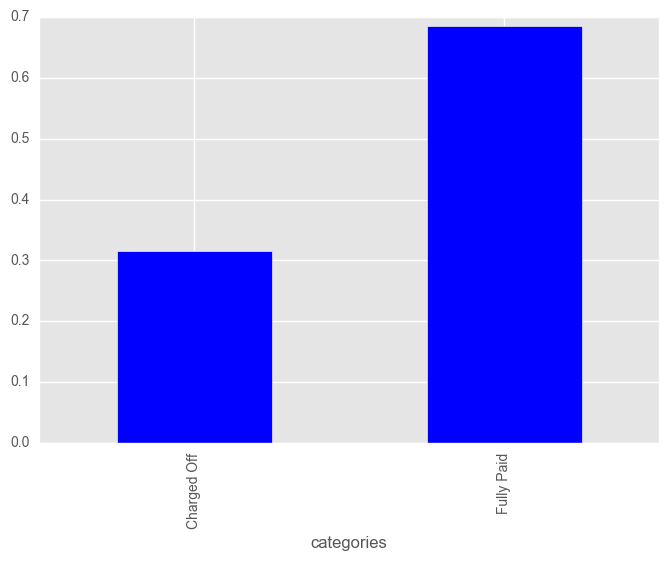

In [11]:
m.freqs.plot(kind ="bar" , color ="blue")

Approximately  31% loan has been charged off where credit score is not available . Let us explore annual_income and find how 
missing values impact there .

In [12]:
missing_annual_income =   loan_data[pd.isnull(loan_data["annual_income"])] 
#missing['loan_status'] = missing['loan_status'].astype(str)
missing_annual_income = pd.Categorical(missing_annual_income['loan_status'] )

m  =  pd.DataFrame(missing_annual_income.describe())
m


,counts,freqs
categories,,
Charged Off,19467,0.315633
Fully Paid,42209,0.684367


Similar impact like credit score .so later we will try to explore relationship between annual_income and credit_score variables .

In [13]:
missing =   loan_data[pd.isnull(loan_data["months_since_last_delinquent"])] 
#missing['loan_status'] = missing['loan_status'].astype(str)
missing = pd.Categorical(missing['loan_status'] )

m  =  pd.DataFrame(missing.describe())
m


,counts,freqs
categories,,
Charged Off,43305,0.308478
Fully Paid,97078,0.691522


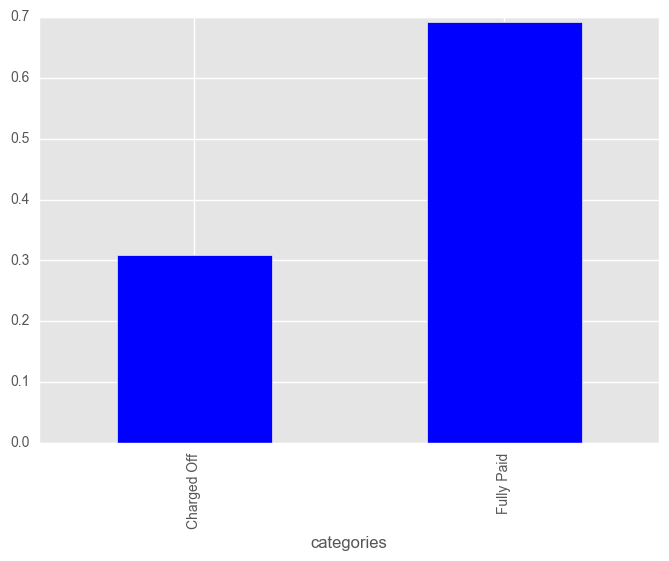

In [14]:
m.freqs.plot(kind ="bar" , color ="blue")

#### Categorical Variables in the Data Set :
There are four categorical Variables in the data set . Term of loans  , Purpose of loans , Home ownership and years in the current job . Among them though here years in current job is categorical variables but we will convert it to continuous as this will have significant impact on credit risk modeling .

There are two types of loan . short term and long term . 

In [15]:
pd.options.display.float_format = '{:,.3f}'.format
def calculate_amount(r ) :
    return  r *1.0/ len(loan_data) 



ct = pd.crosstab(index=loan_data["term"], 
                          columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)


ct


loan_status,Charged Off,Fully Paid
term,,
Long Term,0.116,0.135
Short Term,0.199,0.551


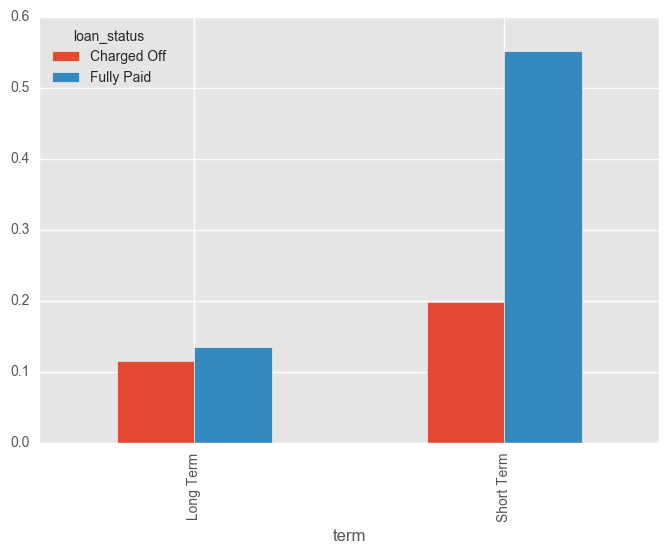

In [16]:
ct.plot(kind="bar", 
                 
                 stacked=False)

Term loan has more vulnerable approximately term loan given to 25% people among them 48% are defaulter which is 12 % of given data set . It seems Short term loan are more safe as it has 20% defaulter which is 26% of the given short term loan . It is provided that 32%  among provided data set are defaulter

In [17]:
ct = pd.crosstab(index=loan_data["purpose"], 
                          columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)


ct

loan_status,Charged Off,Fully Paid
purpose,,
business loan,0.008,0.010
buy a car,0.003,0.010
buy house,0.002,0.004
debt consolidation,0.250,0.544
educational expenses,0.000,0.001
home improvements,0.016,0.042
medical bills,0.004,0.007
other,0.030,0.063
take a trip,0.002,0.004


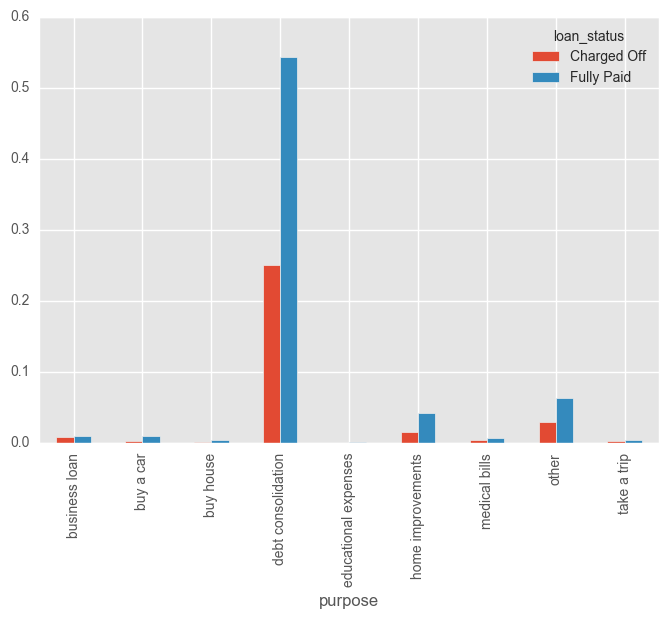

In [18]:
ct.plot(kind="bar", 
                 
                 stacked=False)

Apporximately 80% loans are used for debt consolidation and 25% are defaulter . other loans are very nominal as home improvments amd misc. loans are in second and 3rd positions respectively.

In [19]:
ct = pd.crosstab(index=loan_data["home_ownership"], 
                          columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)


ct

loan_status,Charged Off,Fully Paid
home_ownership,,
HaveMortgage,0.001,0.002
Home Mortgage,0.137,0.348
Own Home,0.029,0.060
Rent,0.148,0.276


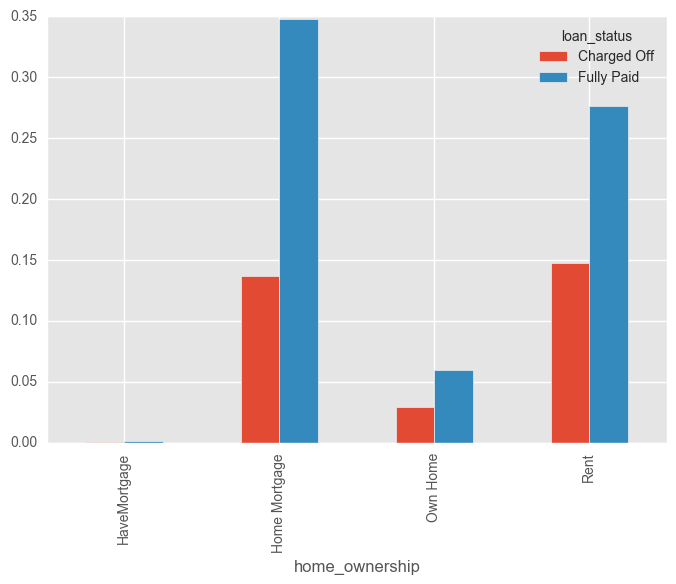

In [20]:
ct.plot(kind="bar", 
                 
                 stacked=False)

Though most loans has been provided to them who has house mortgage . but most defaulter are those who live in house
with Rent . 15% are defaulter which  is more than 34 % of that loan which has been provided to people with rent house


We could leave 'years_in_current_job' as categorical data, but it shouldn't be treated as such or as ordinal data since the intervals are easy to determine. We can convert it into numerical data with a simple filter

In [21]:
ct = pd.crosstab(index=loan_data["years_in_current_job"], 
                          columns=loan_data["loan_status"]  ).apply(lambda x : calculate_amount(x *100) , axis = 1)


ct

loan_status,Charged Off,Fully Paid
years_in_current_job,,
1 year,2.000,4.516
10+ years,9.286,21.415
2 years,2.768,6.362
3 years,2.462,5.577
4 years,1.925,4.366
5 years,2.177,4.774
6 years,1.804,3.876
7 years,1.727,3.708
8 years,1.511,3.239


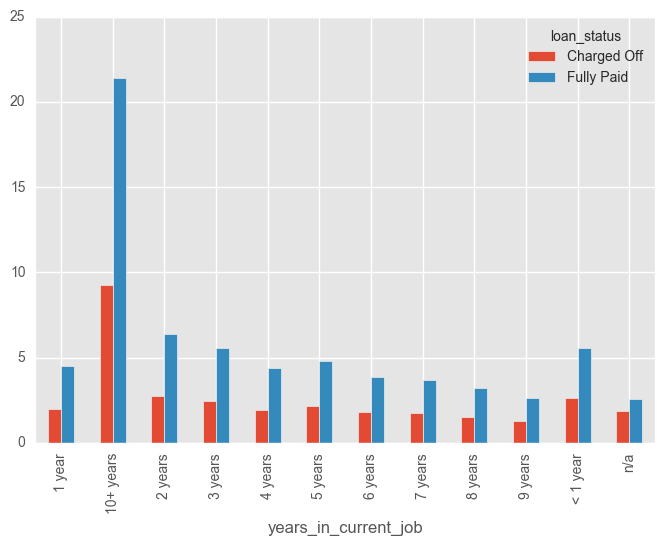

In [22]:
ct.plot(kind="bar", 
                 
                 stacked=False)

From the Above graph it is found that most of the loans given to the employee who have more than 10+ years experience . Since It is a numerica variables we will convert it to numeric values .

In [23]:
loan_data.replace('n/a', np.nan,inplace=True)
loan_data.years_in_current_job.fillna(value=0,inplace=True)
loan_data['years_in_current_job'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_data['years_in_current_job'] = loan_data['years_in_current_job'].astype(int)
loan_data.years_in_current_job.value_counts()


10    78896
1     37758
2     23462
3     20659
5     17864
4     16166
6     14597
7     13968
8     12206
0     11476
9      9932
Name: years_in_current_job, dtype: int64

#### Encoding categorical features :
We have 3 Categorical features .Purpose , Term , home_ownership ,years_in_current_job . We will convert them into distinct features using one hot encoding method and later we will drop the parent column.Before drop this let us understand what is the impact of this features into the data .

In [24]:
def one_hot_encoding(df, colname ) :
    df[colname] =  df[colname].str.lower()
    df[colname] =  df[colname].str.replace(" " ,"_")
    df = pd.concat([df, pd.get_dummies(df[colname]).rename(columns=lambda x:   str(x))], axis=1) 
    df.drop(colname,axis =1 , inplace=True)
    
    return df

loan_data = one_hot_encoding(loan_data, 'purpose' ) ;
loan_data =  one_hot_encoding(loan_data, 'term' ) ;
loan_data = one_hot_encoding(loan_data, 'home_ownership' ) ;

del loan_data["loan_status"]



print loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 29 columns):
current_loan_amount             256984 non-null int64
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null int32
annual_income                   195308 non-null float64
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256980 non-null float64
bankruptcies                    256455 non-null float64
tax_liens                       256961 non-null float64
defaulter_or_not                256984 non-null int64
business_loan                   256984 non-null float64
buy_a_car                       256984 non-null float64
buy_h

#### Exploring Continuous Data :
Discrete data are, again, data with a finite or countably infinite number of possible outcomes. Continuous data, on the other hand, are data which come from an interval of possible outcomes.In our Data set examples of continuous variables include :
   - Current loan amount           
   - Credit score                  
   - Years in current job          
   - Annual income                 
   - Monthly debt                  
   - Years of credit history       
   - Months since last delinquent  
   - Number of open accounts       
   - Number of credit problems     
   - Current credit balance        
   - Maximum open credit      
   
In each of these examples, the resulting measurement comes from an interval of possible outcomes. and the measurement tool is often the restricting factor with continuous data. We'll summarize the data graphically using histograms,Kernel Density estimator , plots, and box plots.Here, we'll investigate how to summarize continuous data numerically using order statistics and various functions of order statistics.

#### Imputing missing values :
Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.

Detecting missing values is the easy part: it is far more difficult to decide how to handle them. In cases where we have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. Missing values in categorical data are not particularly troubling because we can simply treat NA as an additional category. Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number. 

Here are a few ways we could deal with them:

1. Replace the null values with 0s
2. Replace the null values with some central value like the mean or median
3. Impute values (estimate values using statistical/predictive modeling methods.).

This example shows that imputing the missing values can give better results than discarding the samples containing any missing value. Sometimes dropping rows or using marker values is more effective. Here we will tackle missing values with mean values of that column. So there is no missing Values . xgboost will handle missing values by itself but for other algorithm we have decided to impute missing values with mean .


In [25]:
import warnings
warnings.filterwarnings("ignore")

features = list(loan_data.columns)
features.remove('defaulter_or_not');

target =  'defaulter_or_not'
target =  'defaulter_or_not'


X1 =  loan_data[list(features)].values
y1 = loan_data[target].values


rng = np.random.RandomState(0)

n_samples = len(X1)
n_features = len(features)

X1[np.isnan(X1)] = 0


# Estimate the score on the entire dataset, with no missing values

estimator = DecisionTreeClassifier(random_state=0 , max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   
score = cross_val_score(estimator, X1, y1).mean()
print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = np.floor(n_samples * missing_rate)
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=np.bool),
                             np.ones(n_missing_samples,
                                     dtype=np.bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
X_filtered = X1[~missing_samples, :]
y_filtered = y1[~missing_samples]
estimator = DecisionTreeClassifier(random_state=0 , max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   
score = cross_val_score(estimator, X_filtered, y_filtered).mean()
print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
X_missing = X1.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y1.copy()
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", DecisionTreeClassifier(random_state=0 , \
                                                        max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   )])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score with the entire dataset = 0.75
Score without the samples containing missing values = 0.76
Score after imputation of the missing values = 0.75


From the above , we can say that if we repalce all of our data with mean then that will have minimum impact on accuracy level . So for other learning algorithm, we will replace our missing values with mean values. But for xgboost we will let learining parameter to decide the best way to handle missing values.

In [26]:

loan_data['annual_income'].fillna((loan_data['annual_income'].mean()), inplace=True)
loan_data['months_since_last_delinquent'].fillna((loan_data['months_since_last_delinquent'].mean()), inplace=True)
loan_data['credit_score'].fillna((loan_data['credit_score'].mean()), inplace=True)
loan_data['bankruptcies'].fillna((loan_data['bankruptcies'].mean()), inplace=True)
loan_data['tax_liens'].fillna((loan_data['tax_liens'].mean()), inplace=True)
loan_data['maximum_open_credit'].fillna((loan_data['tax_liens'].mean()), inplace=True)

loan_data.isnull().sum()



current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
defaulter_or_not                0
business_loan                   0
buy_a_car                       0
buy_house                       0
debt_consolidation              0
educational_expenses            0
home_improvements               0
medical_bills                   0
other                           0
take_a_trip                     0
long_term                       0
short_term                      0
havemortgage                    0
home_mortgage                   0
own_home                        0
rent                            0
dtype: int64

Now we will explore all continuous variables and explore all outliers .

In [27]:
defaulter = loan_data[['current_loan_amount' ,'credit_score','years_in_current_job','annual_income','monthly_debt',\
                       'years_of_credit_history', \
                      'months_since_last_delinquent', 'number_of_open_accounts' ,'number_of_credit_problems' ,\
                       'current_credit_balance' ,  'maximum_open_credit']].loc[loan_data['defaulter_or_not'] == 1]

print defaulter.info()

non_defaulter = loan_data[['current_loan_amount' ,'credit_score','years_in_current_job','annual_income','monthly_debt'\
                           ,'years_of_credit_history', \
                      'months_since_last_delinquent', 'number_of_open_accounts' ,'number_of_credit_problems' ,\
                       'current_credit_balance' ,  'maximum_open_credit']].loc[loan_data['defaulter_or_not'] == 0]

print non_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80793 entries, 6 to 256982
Data columns (total 11 columns):
current_loan_amount             80793 non-null int64
credit_score                    80793 non-null float64
years_in_current_job            80793 non-null int32
annual_income                   80793 non-null float64
monthly_debt                    80793 non-null float64
years_of_credit_history         80793 non-null float64
months_since_last_delinquent    80793 non-null float64
number_of_open_accounts         80793 non-null int64
number_of_credit_problems       80793 non-null int64
current_credit_balance          80793 non-null int64
maximum_open_credit             80793 non-null float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 7.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176191 entries, 0 to 256983
Data columns (total 11 columns):
current_loan_amount             176191 non-null int64
credit_score                    176191 non-null float64
years_in_

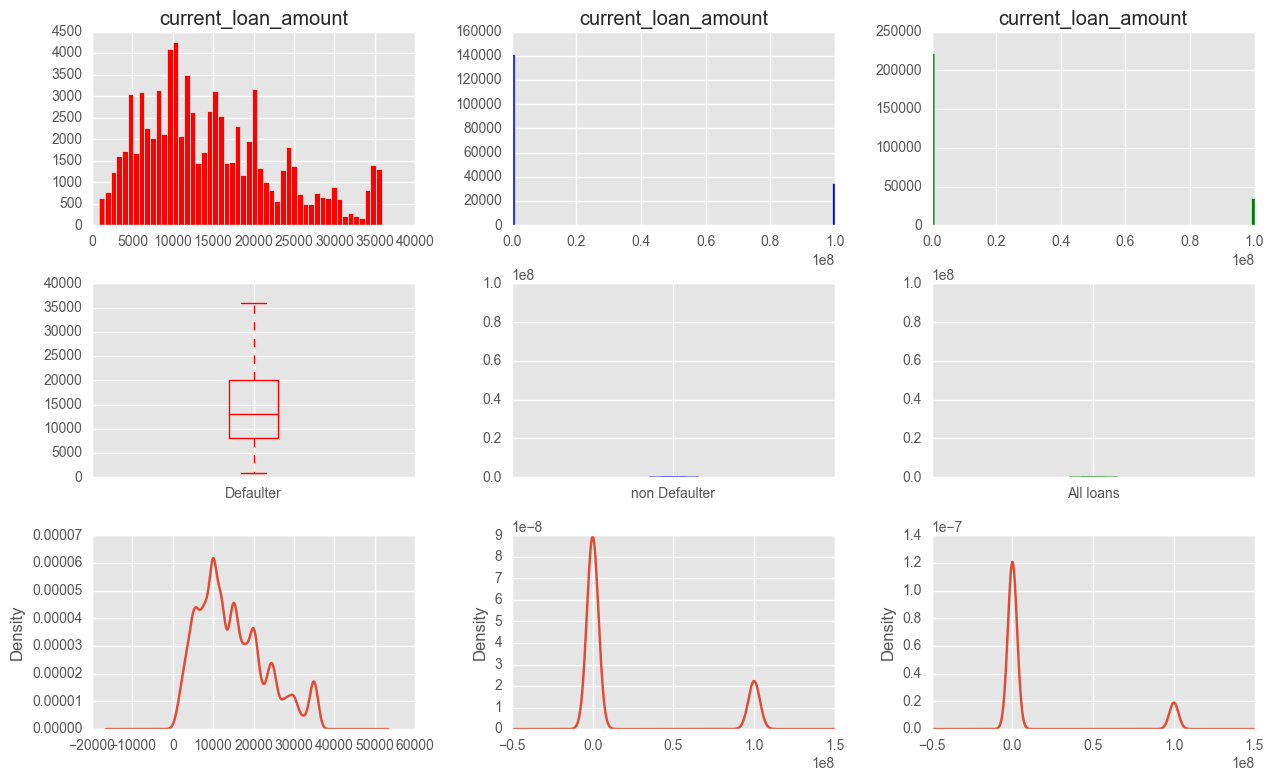

In [28]:
def eda_continuous_var(colname , logx , logy ) :
    f, axarr = plt.subplots(3, 3)
    f.set_size_inches(15, 9)
    ax1 = axarr[0, 0]
    axarr[0, 0].set_label('Defaulter')
    
    defaulter.hist(column=colname,        # Column to plot
                          # Plot size
                      color="red" ,
                      bins=50 ,ax =axarr[0, 0] ) 

    axarr[0, 1].set_label('Non-Defaulter')
    non_defaulter.hist(column=colname,        # Column to plot
                          # Plot size
                      color="blue" ,
                      bins=100,ax = axarr[0, 1] ) 

    axarr[0, 2].set_label('All')
    loan_data.hist(column = colname,        # Column to plot
                          # Plot size
                      color="green" ,
                      bins=100,ax = axarr[0, 2] ) 
    
    defaulter[colname].plot(kind ="box" , ax = axarr[1,0 ] , color ="red" , label ="Defaulter")
    non_defaulter[colname].plot(kind ="box" , ax = axarr[1,1] , color ="blue" ,label ="non Defaulter")
    loan_data[colname].plot(kind ="box" , ax = axarr[1,2 ] , color ="green" , label ="All loans")
    defaulter[colname].plot(kind="density",  # Create density plot
                      ax =axarr[2,0] ,logx =logx , logy = logy )
    non_defaulter[colname].plot(kind="density",  # Create density plot
                      ax =axarr[2,1] ,logx =logx , logy = logy)
    loan_data[colname].plot(kind="density",  # Create density plot
                      ax =axarr[2,2] ,logx =logx , logy = logy )
    
   
    plt.show()

eda_continuous_var('current_loan_amount',False , False) 

From the above Plot we can say that the distribution is skewed to the right For defaulter persons .. and There are some values beyond Inter Quartile Range(IQR). and Kernel Density estimator is undersmooth for defaulter person. But for Non defaulter it has bimodal distributions which contains two peak .

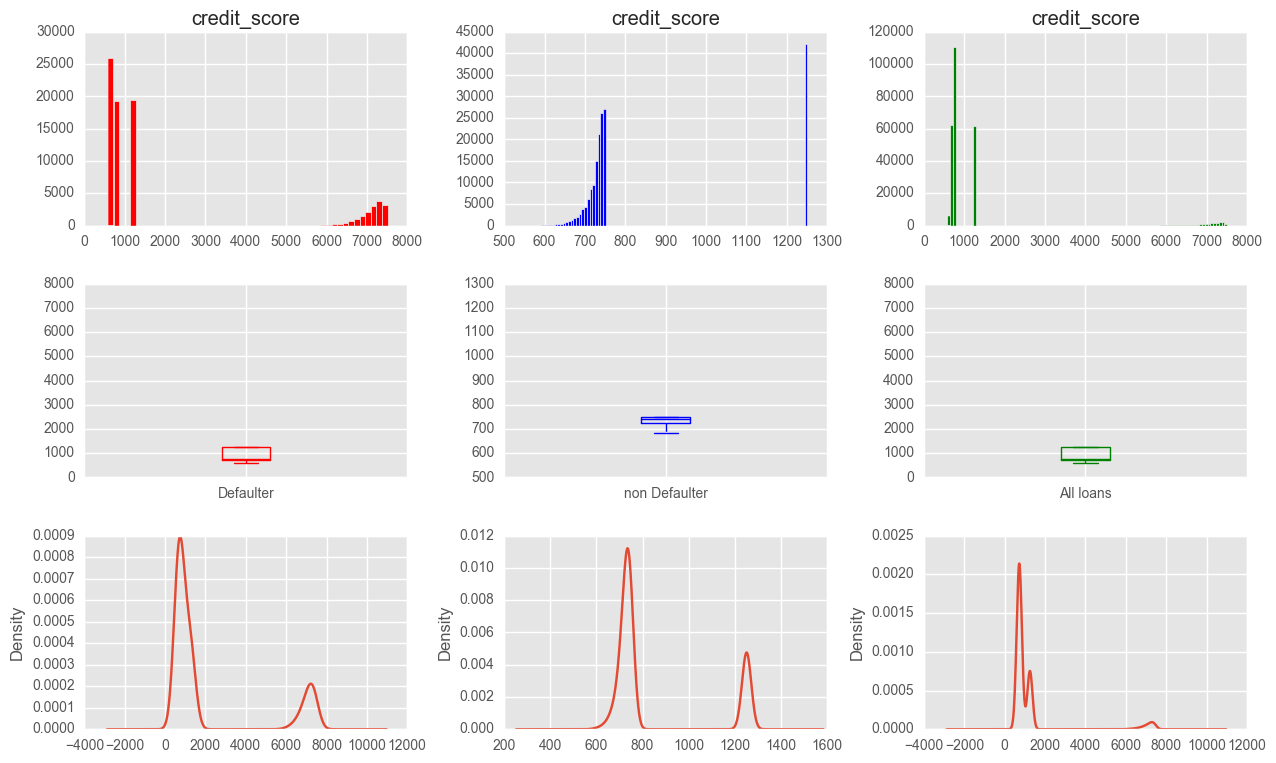

In [29]:
eda_continuous_var('credit_score',False , False) 

For Defaulter if the credit score with Defaulter loans are bimodal . and it is skewed to the left. it seems who has credit score between 0 to 2000 or 6000 to 8000 to be more vulnerable .However credit score between 600-800 seems to be the best non defaulter and seems less vaulnerable .


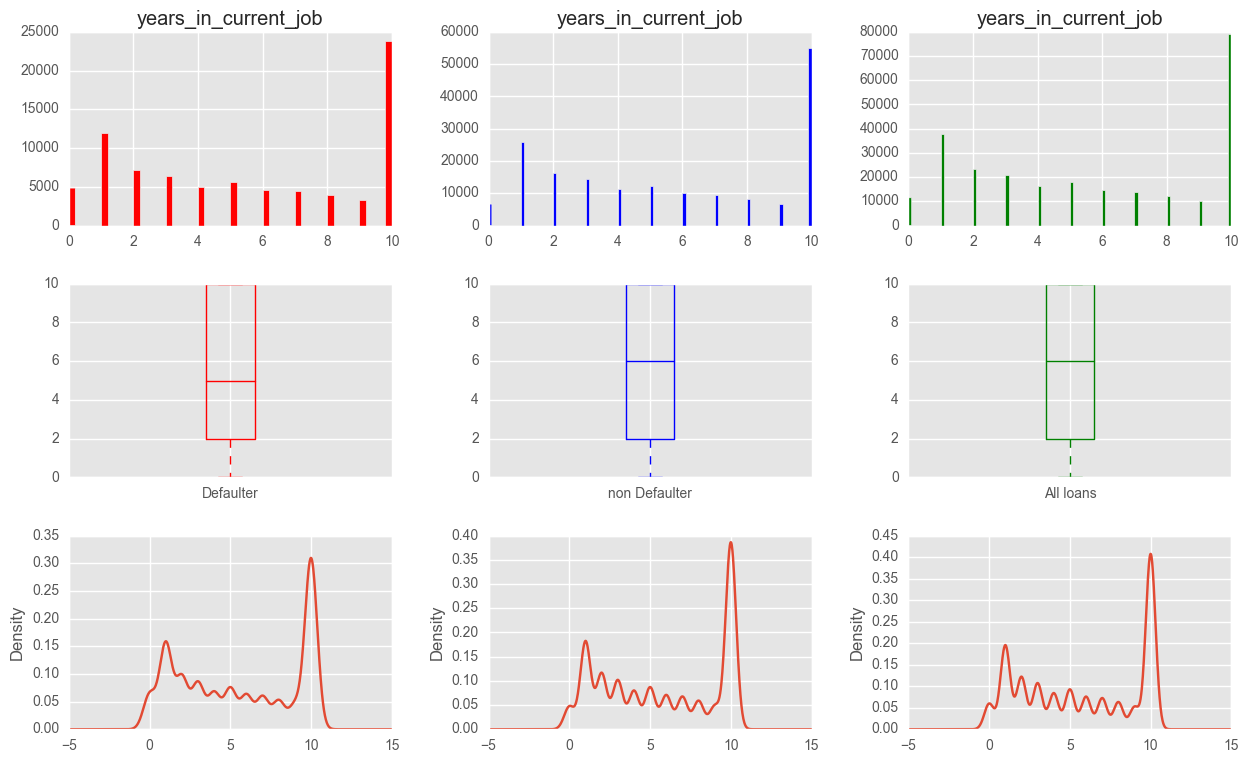

In [30]:
eda_continuous_var('years_in_current_job',False,False) 


For Credit Risk Category this feature does not convey any meaningful information if we analyze the kde graph.

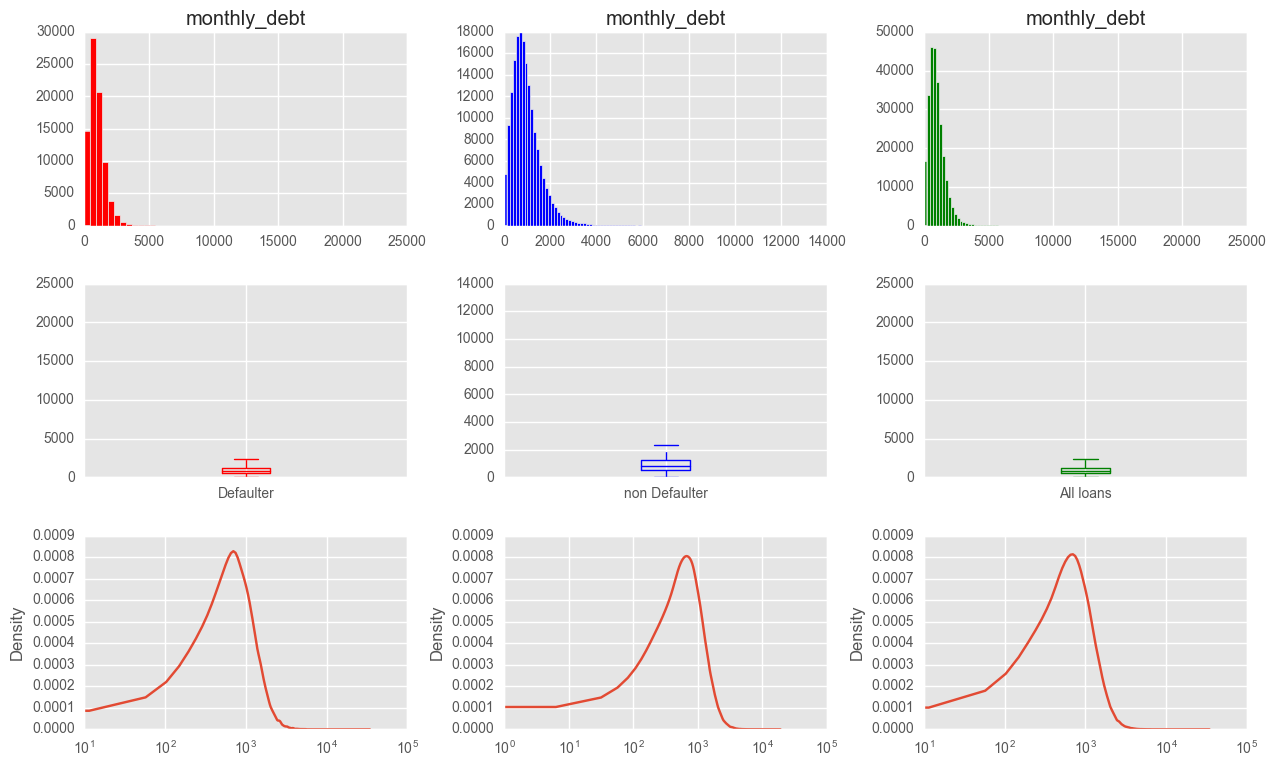

In [31]:
eda_continuous_var('monthly_debt', True , False)      

   
  

It seems From the graph who has monthly debty higher than 2000 seems to be defaulter as the other graph with non defaulter
who has monthly debt less than 2000 are good candidate to be considered for loan

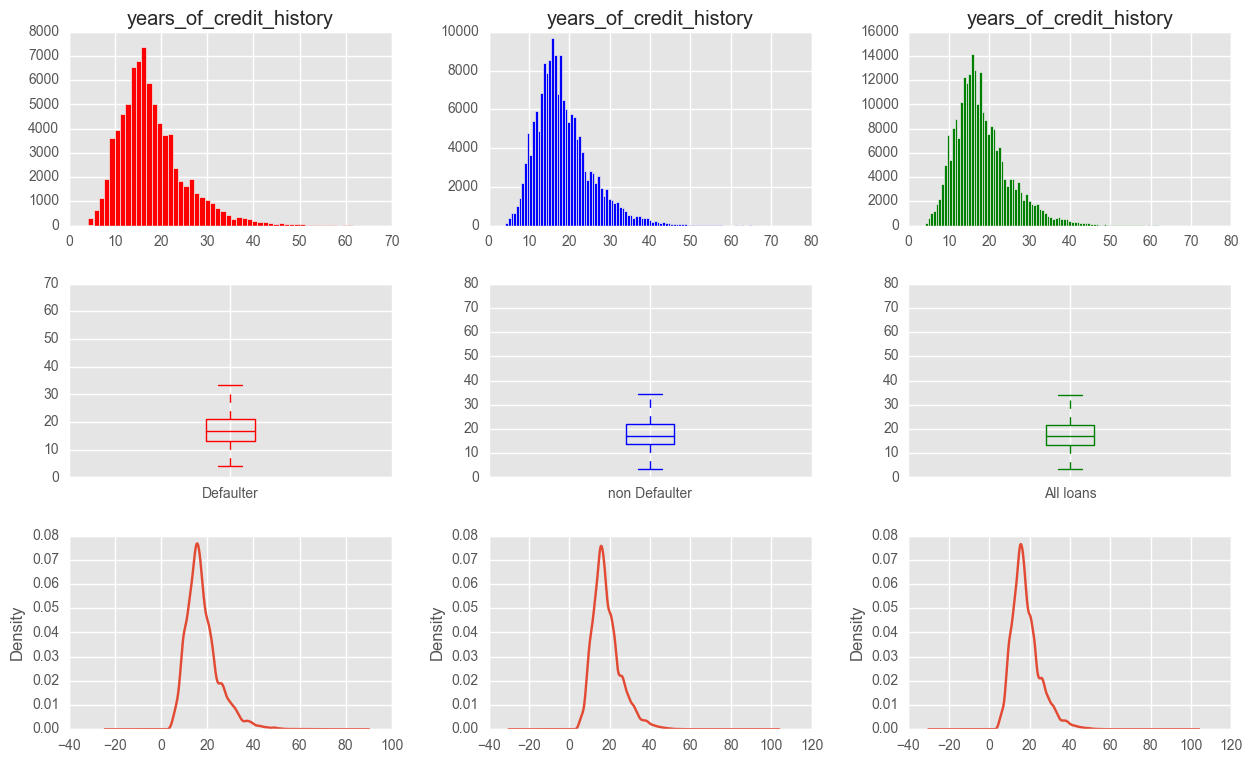

In [32]:
eda_continuous_var('years_of_credit_history',False , False)    


      

This feature may be not that much use full for loan categorization

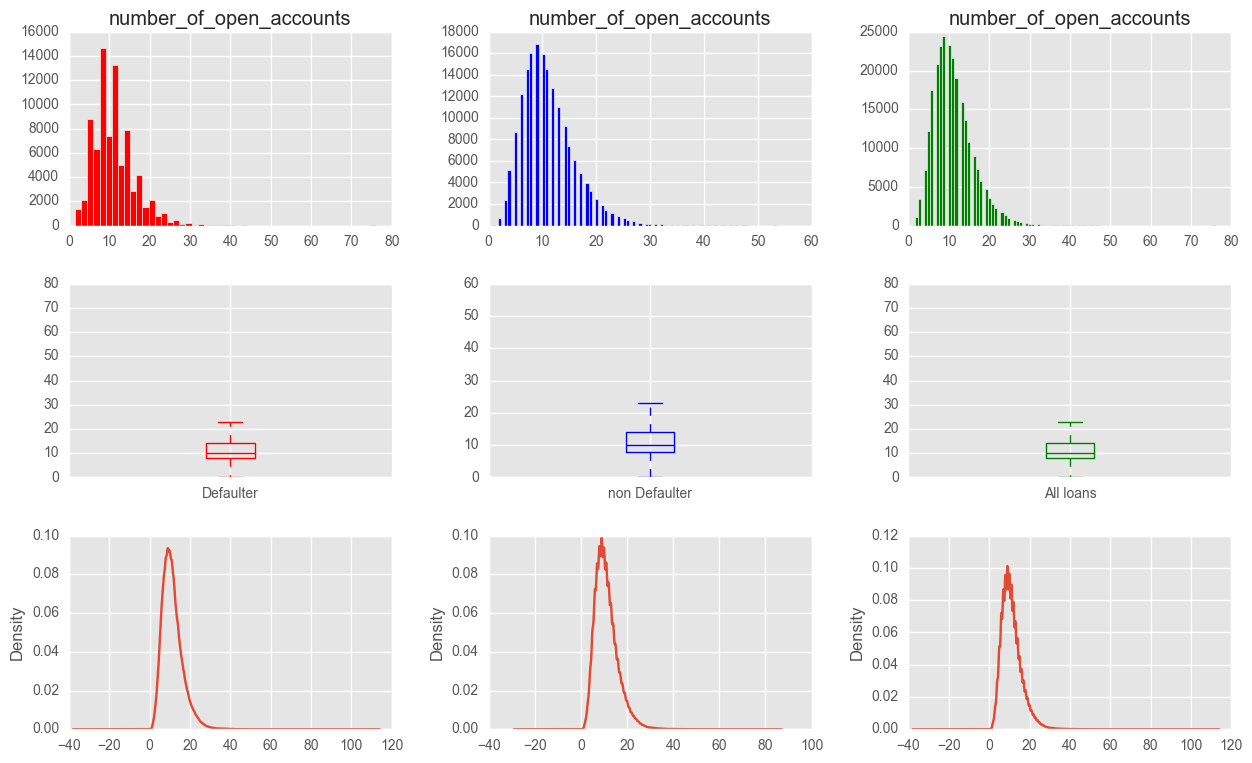

In [33]:
eda_continuous_var('number_of_open_accounts' ,False , False)    


This graph does not convey any meaningfull relation between number of accounts and credit risk .

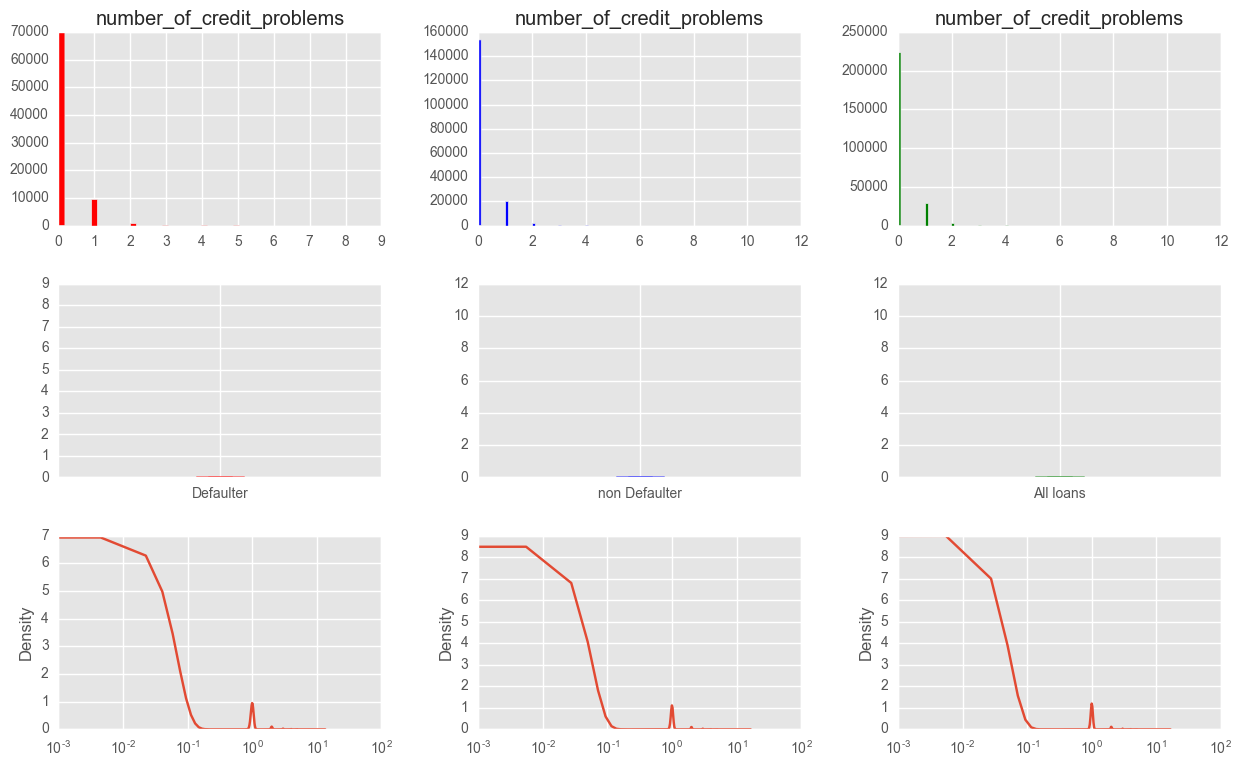

In [34]:
eda_continuous_var('number_of_credit_problems' , True , False)    


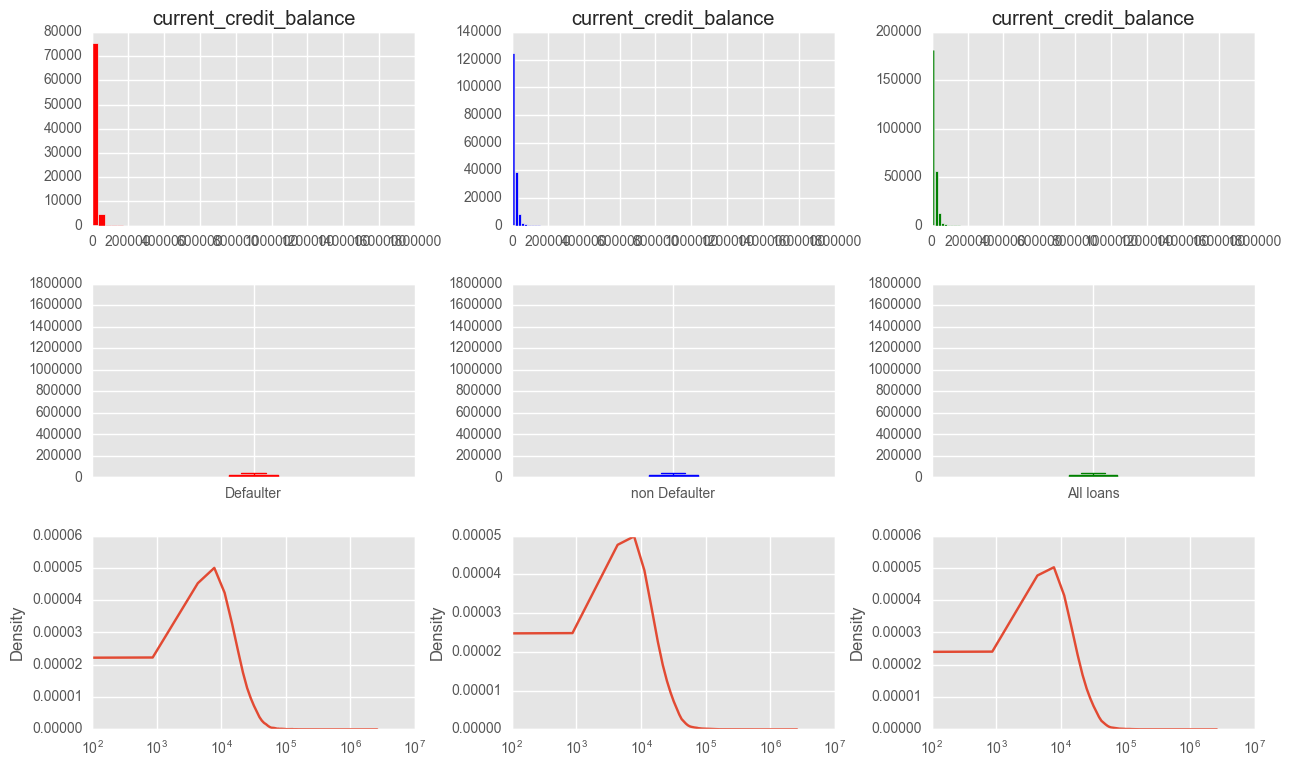

In [35]:
eda_continuous_var('current_credit_balance',True , False)    


From the above exploratory diagram we can Find that most of the continuous variables are rightly skewed to defaulter data .

### Association Between  Variables :
Here we will learn how to statistically test for a relationship between two categorical variables. Categorical variables are related when the category that a subject is classified as for one variable "influences" the category that a subject is classified as in another variable. In other words, the category one is classified as for one variable "depends" on the category one is classified as in another variable. The chi-square (χ2χ2) test of independence will be used to test for this relationship.



#### Chi-Square Test of Independence :
The chi-square (χ2) test of independence is used to test for a statistically significant relationship between two categorical variables. This is an inferential test that uses data from a sample to make conclusions about the relationship between categorical variables in the population.

The chi-square distribution is a special type of right skewed distribution.  Like the t distribution, the chi-square distribution varies depending on the degrees of freedom. 

An observed relationship will be called statistically significant when the p-value for a chi-square test is less than αα (typically α=.05). In this case, if we reject the null hypothesis, then we generalize that there is a relationship in the population.

In [36]:
cor = defaulter.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0) | (cor < 0)]

credit_score                  current_loan_amount            -0.013
years_in_current_job          current_loan_amount             0.156
                              credit_score                    0.003
annual_income                 current_loan_amount             0.259
                              credit_score                   -0.013
                              years_in_current_job            0.079
monthly_debt                  current_loan_amount             0.453
                              credit_score                   -0.003
                              years_in_current_job            0.151
                              annual_income                   0.345
years_of_credit_history       current_loan_amount             0.153
                              credit_score                    0.005
                              years_in_current_job            0.107
                              annual_income                   0.092
                              monthly_debt      

Most of the continuous variables are not strongly associated with each other since there co-relation is very less . Let us plot this visually to get the association among these variables


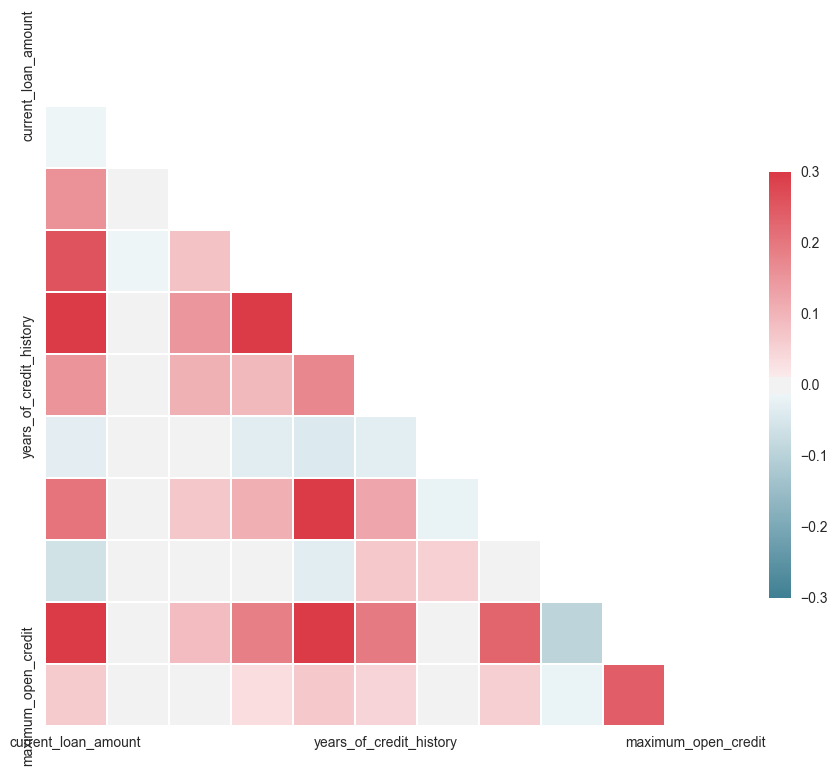

In [37]:
"""
Plotting a diagonal correlation matrix
======================================

_thumb: .3, .6
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = defaulter.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Apply Machine Learning Model to Data Set :
To predict the class of the loan we will use supervised model for classification .our goal is to predict class level which is a choice of predefined list of possiblities . Our goal is to make accuratepredictions for new, never-before-seen data. Supervised learning oftenrequires human effort to build the training set, but afterwardautomates and often speeds up an otherwise laborious or infeasible task.For now we will go through the algorithm themselves by first .

#### k-Nearest Neighbours :
The k-NN algorithm is arguably the simplest machinelearning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the  algorithm finds the closest data points in the training dataset—its “nearest neighbors.”
##### How do we choose the factor K?
we can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access on different K-value. Following is the curve for the training error rate with varying value of K :

In [38]:
features = list(loan_data.columns)
features.remove('defaulter_or_not');

target =  'defaulter_or_not'


X =  loan_data[list(features)].values
y = loan_data[target].values

X_samples = X[1:50000]
y_samples = y[1:50000]



train_X, test_X, train_Y, test_Y =  train_test_split(X_samples, y_samples, test_size= .25, random_state=66)


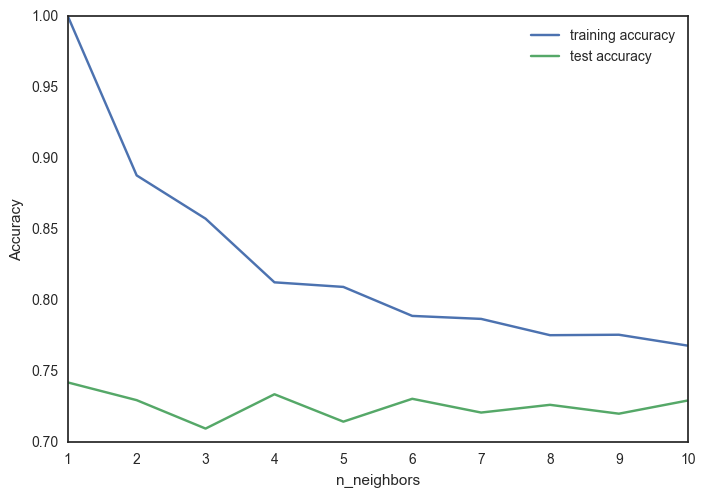

In [39]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:    # build the model   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
    clf.fit(train_X, train_Y)    # record training set accuracy
    training_accuracy.append(clf.score(train_X, train_Y))    # record generalization accuracy   
    test_accuracy.append(clf.score(test_X, test_Y))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()



From the above diagram we can find that for K=1 we get training accuracy 100 % but test accuracy less than 75%. if k=8 to 10 we get less difference between test and train data . for our modelling we will use k=10

###### Strengths, weaknesses, and parameters of kNN :
In principle, there are two important parameters to the KNeighbors classifier: 
1. the number of neighbors 
2. how we measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. 

There are several advantages of Knn :
The model is very easy to understand, and often gives reasonable performance without a lot of adjustments .Using this algorithm is a good baseline method to try before considering mIore advanced techniques.
On the other hand though it is fast but for larger training set prediction may be slow .It does not perform well when data set have many features . In these later method we will try to reduce or overcome the limitation of Knn

#### LINEAR MODELS FOR CLASSIFICATION :
The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. 


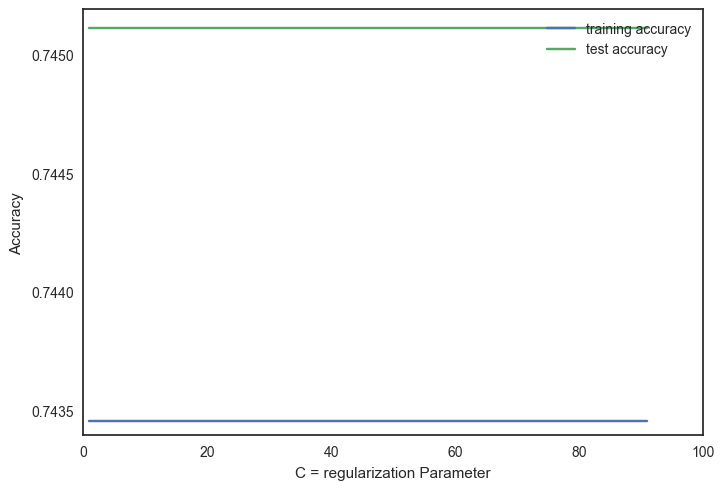

In [40]:

training_accuracy = []
test_accuracy = []# try n_neighbors from 1 to 10
c_settings = range(1,100 ,10)
for c in c_settings:    # build the model   
    clf = LogisticRegression(C=c)    
    clf.fit(train_X, train_Y)    # record training set accuracy
    training_accuracy.append(clf.score(train_X, train_Y))    # record generalization accuracy   
    test_accuracy.append(clf.score(test_X, test_Y))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C = regularization Parameter")
plt.legend()
plt.show()



For this Logistic regression we are plotting and finding now much variation . though training accuracy is less then test accuracy .

#### Naive Bayes Classifiers :
Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed in the previous section. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC.

The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. 

##### Strengths, weaknesses, and parameters
MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics. A large alpha means more smoothing, resulting in less complex models. 

The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.






#### Decision Trees :
   Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
   
How does a tree decide where to split : 
   The decision of making strategic splits heavily affects a tree’s accuracy. Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.  
   
   Gini Index :
   if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.
   
   Chi-Square :
   It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.
   
   Information Gain:
   Look at the image below and think which node can be described easily. I am sure, your answer is C because it requires less information as all values are similar.
   
   Reduction in Variance :
   Till now, we have discussed the algorithms for categorical target variable. Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population:
   
   \begin{equation*}
   varience = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
   \end{equation*}
   

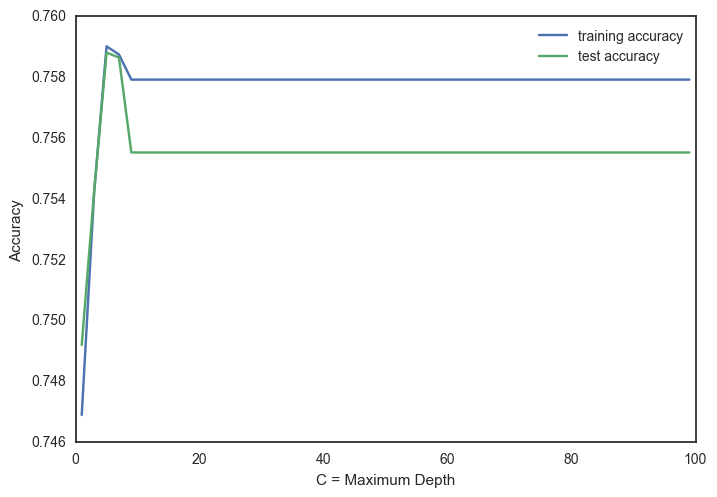

In [41]:

training_accuracy = []
test_accuracy = []# try n_neighbors from 1 to 10
max_depth_settings = range(1,100 ,2)
for c in max_depth_settings:    # build the model   
    clf = DecisionTreeClassifier(random_state=0 , max_depth=c ,max_leaf_nodes = 20 ,criterion =  "entropy" )   
    clf.fit(train_X, train_Y)    # record training set accuracy
    training_accuracy.append(clf.score(train_X, train_Y))    # record generalization accuracy   
    test_accuracy.append(clf.score(test_X, test_Y))

plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C = Maximum Depth")
plt.legend()
plt.show()


##### Strengths, weaknesses, and parameters
As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

Advantages includes :
the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

#### Random Forest Model :
Bagging is a technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer .
The steps followed in bagging are:

1. Create Multiple DataSets:
Sampling is done with replacement on the original data and new datasets are formed.The new data sets can have a fraction of the columns as well as rows, which are generally hyper-parameters in a bagging model.
Taking row and column fractions less than 1 helps in making robust models, less prone to overfitting
2. Build Multiple Classifiers:
Classifiers are built on each data set.
Generally the same classifier is modeled on each data set and predictions are made.
3. Combine Classifiers:
The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

##### Strengths, weaknesses, and parameters

This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
One of benefits of Random forest which excites me most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).

#### Extreme Gradient Boosting (xgboost) :

Extreme Gradient Boosting (xgboost) is similar to gradient boosting framework but more efficient. It has both linear model solver and tree learning algorithms. So, what makes it fast is its capacity to do parallel computation on a single machine.

This makes xgboost at least 10 times faster than existing gradient boosting implementations. It supports various objective functions, including regression, classification and ranking.

Since it is very high in predictive power but relatively slow with implementation, “xgboost” becomes an ideal fit for many competitions. It also has additional features for doing cross validation and finding
Gradient Boosted Regression Trees :


##### Strengths, weaknesses, and parameters
Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data.

The main parameters of gradient boosted tree models are the number of trees, n_estimators, and the learning_rate, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over different learning_rates.

#### Multi-layer Perceptron (MLP)  :

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features X = {x_1, x_2, ..., x_m} and a target y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. 

The advantages of Multi-layer Perceptron are:
   1. Capability to learn non-linear models.
   2. Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:
1. MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
2. MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
3. MLP is sensitive to feature scaling.

In [52]:
classifiers = [(LogisticRegression() ,"LR"),
               ( GaussianNB() ,"NB" ),
                  ( KNeighborsClassifier(10),"Knn" ) ,
        
        (DecisionTreeClassifier(min_samples_split =5 ,max_depth= 10 ),"DTC"
    ),
        
        (RandomForestClassifier(n_estimators=15), "RF"),
                (MLPClassifier(alpha=1),"MLPC") ,
          
    (AdaBoostClassifier( ),"AdaBoost"),
    
    ( QuadraticDiscriminantAnalysis(),"QDA"), ( XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=50,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27) ,"XGboost" )
                 

                 
                 
                 
                                  
                 
                 
                 ]

#### Evaluation : 
In classification problems, we use two types of algorithms (dependent on the kind of output it creates):

Class output : Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. However, today we have algorithms which can convert these class outputs to probability. But these algorithms are not well accepted by the statistics community.

Probability output : Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Converting probability outputs to class output is just a matter of creating a threshold probability.

#### Confusion Matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :

Accuracy : the proportion of the total number of predictions that were correct.

Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.

Negative Predictive Value : the proportion of negative cases that were correctly identified.

Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.

Specificity : the proportion of actual negative cases which are correctly identified.

In [53]:
# Benchmark classifiers
def benchmark(clf, name , report ):
    if report  == "cns" or report  == "cls"  :
        print('_' * 80)
        print("Training: ")
        print(name)
    t0 = time()
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
            
    train_time = time() - t0
    #print("train time: %0.3fs" % train_time)
    #print()
    t0 = time()
    y_pred = clf.predict(test_X)
    test_time = time() - t0
    #print("test time:  %0.3fs" % test_time)
    
    score = metrics.accuracy_score(test_Y, y_pred)
    

    roc = roc_auc_score(test_Y, y_pred)
    #print ("AUC Score (Roc): %0.3f" % roc )
    recall = recall_score(test_Y, y_pred)

    #print ("recall score :%0.3f " % recall )
    f1 = f1_score(test_Y, y_pred) 
    #print ("F1 score :%0.3f"  %  f1 )
    precision = precision_score(test_Y, y_pred)
    #print (  "Precision score : %0.3f " % precision )
    if(report == 'cnf' ):
        cnf =  confusion_matrix(test_Y, y_pred)
        print("accuracy:   %0.3f" % score)
        if hasattr(clf, 'coef_'):
             print("dimensionality: %d" % clf.coef_.shape[1])
             print("density: %f" % density(clf.coef_))
       
        print cnf
    if(report =='cls' ) :
        cls = classification_report(test_Y, y_pred) 
        print cls
        
    
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score , train_time ,test_time , roc ,  recall , f1, precision

In [44]:
results = []
for clf, name in classifiers :
    print('=' * 80)
    print(name)
    results.append(benchmark(clf ,name,"cnf" ))
    


Logistic Regression 
accuracy:   0.745
dimensionality: 28
density: 1.000000
[[8464  102]
 [3084  850]]
Naive Bayes
accuracy:   0.461
[[1856 6710]
 [  29 3905]]
Nearest neighbers
accuracy:   0.729
[[7919  647]
 [2735 1199]]
Decision Tree Classifier
accuracy:   0.752
[[7861  705]
 [2394 1540]]
Random forest
accuracy:   0.824
[[7900  666]
 [1529 2405]]
MLPClassifier
accuracy:   0.744
[[8460  106]
 [3089  845]]
AdaBoost
accuracy:   0.763
[[8062  504]
 [2454 1480]]
QDA
accuracy:   0.462
[[1887 6679]
 [  44 3890]]
XGboost Classifier
accuracy:   0.764
[[8196  370]
 [2578 1356]]


####  Classification Report :
Classification Report contains Recall , Precision, F1 Score . Other than accuray we will evaluate all these parameter also. Let us Find out the summary for all attributes .



In [45]:
results = []
for clf, name in classifiers :
    print('=' * 80)
    print(name)
    results.append(benchmark(clf ,name,"cls" ))
    

Logistic Regression 
________________________________________________________________________________
Training: 
Logistic Regression 
             precision    recall  f1-score   support

          0       0.73      0.99      0.84      8566
          1       0.89      0.22      0.35      3934

avg / total       0.78      0.75      0.69     12500

Naive Bayes
________________________________________________________________________________
Training: 
Naive Bayes
             precision    recall  f1-score   support

          0       0.98      0.22      0.36      8566
          1       0.37      0.99      0.54      3934

avg / total       0.79      0.46      0.41     12500

Nearest neighbers
________________________________________________________________________________
Training: 
Nearest neighbers
             precision    recall  f1-score   support

          0       0.74      0.92      0.82      8566
          1       0.65      0.30      0.41      3934

avg / total       0.71      0.7

Now let us plot all attributes and compare their performance.

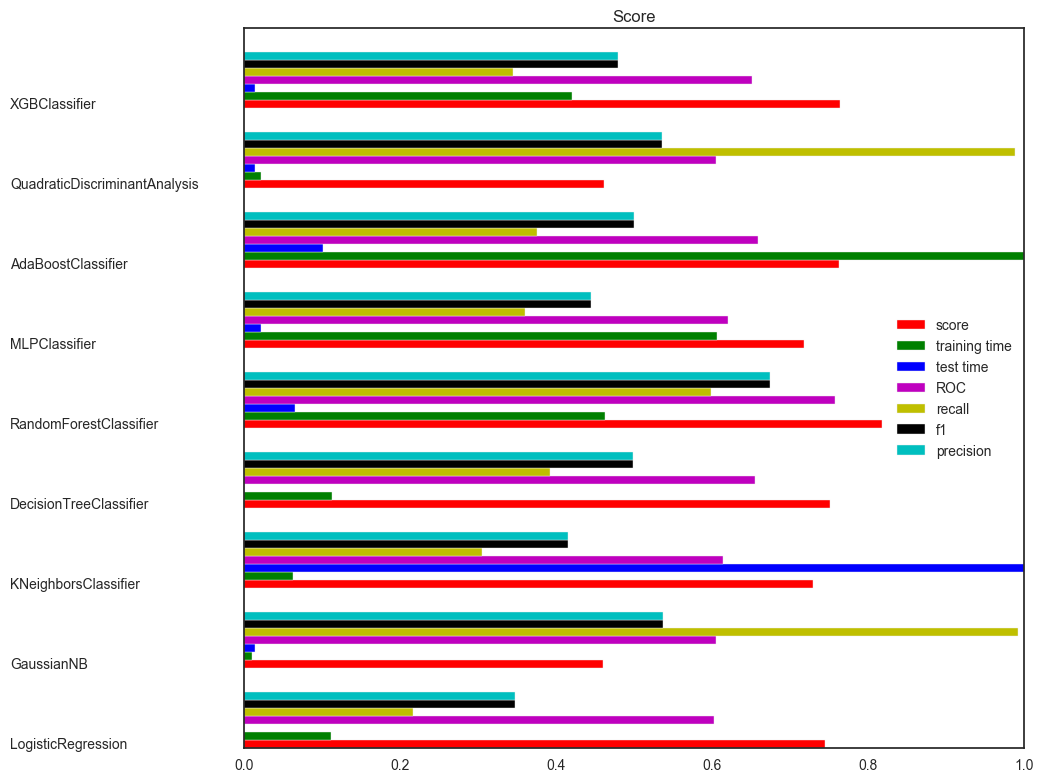

In [59]:
results = []
for clf, name in classifiers :
    results.append(benchmark(clf ,name,'none' ))
    
    
indices = np.arange(len(results))
#print (results)

results = [[x[i] for x in results] for i in range(8 )]


clf_names, score, training_time, test_time,  roc ,  recall , f1, precision  = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .1, label="score", color='r')
plt.barh(indices + .1, training_time, .1, label="training time", color='g')
plt.barh(indices + .2, test_time, .1, label="test time", color='b')
plt.barh(indices + .3, roc , .1, label="ROC", color='m')
plt.barh(indices + .4, recall , .1, label="recall", color='y')
plt.barh(indices + .5, f1 , .1, label="f1", color='k')
plt.barh(indices + .6, f1 , .1, label="precision", color='c')


plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Here After analyzing the bar chart with 7 categories we find that ,
* Random Forest has the maximum accuracy , roc , f1 and precision value
* Adaboost classifier has the maximum Tranining time but less test time (the lower the better)
* Knn hass the maximum test time .

So from this above bar grap we can reach into the decision that Random forest has less training time and test time
despite  the fact for our data set it shows better accuracy and performs better in other evaluation metrics .


#### Area Under the ROC curve (AUC – ROC) :
The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Following is the ROC curve for the case in hand.

Note that the area of entire square is 1*1 = 1. Hence AUC itself is the ratio under the curve and the total area. For the case in hand, we get AUC ROC as 96.4%. Following are a few thumb rules:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)
We see that we fall under the excellent band for the current model. But this might simply be over-fitting. In such cases it becomes very important to to in-time and out-of-time validations.




In [55]:
def calculate_fpr_tpr(clf , name ) :
    
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
    
    
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(test_X)
    else:
        y_score = clf.predict_proba(test_X)[:, 1]
    
    
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =  2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_Y, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr ,fpr , tpr , roc_auc 

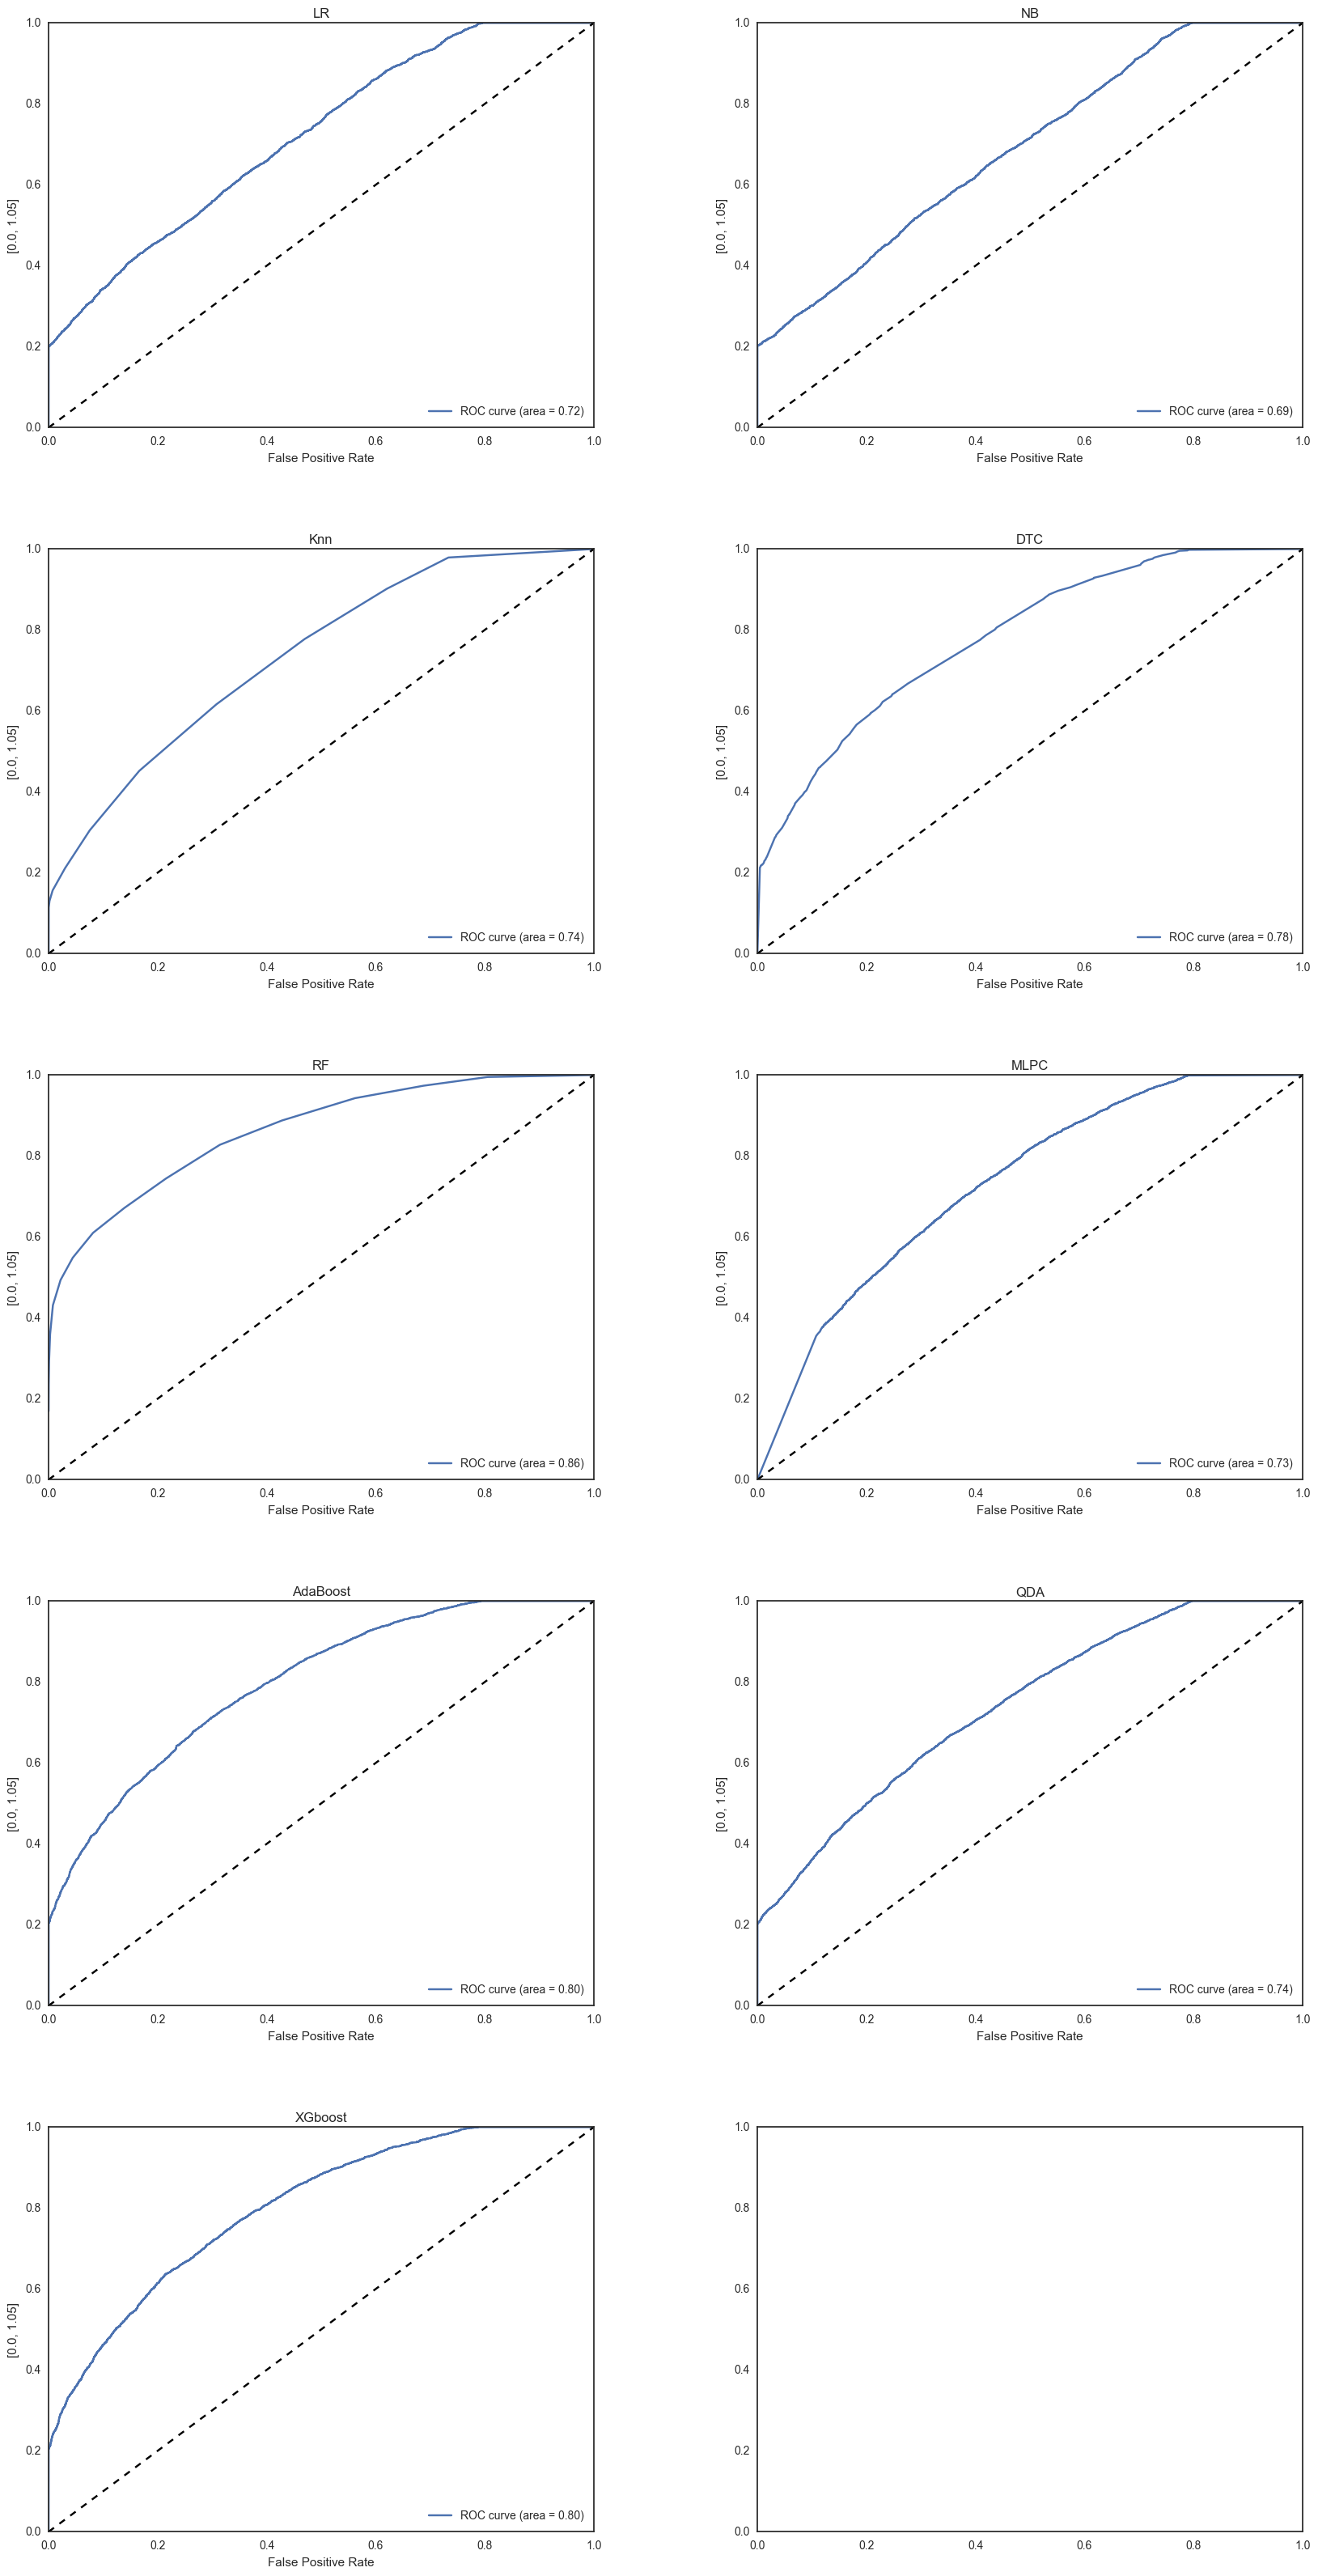

In [56]:
fig, axs = plt.subplots(5,2, figsize=(20,40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.3)

axs = axs.ravel()
i = 0 


for clf, name in classifiers :
       
    clf_descr ,fpr , tpr , roc_auc   =  calculate_fpr_tpr(clf, name)
    axs[i].plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
    axs[i].plot([0, 1], [0, 1], 'k--')
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylabel([0.0, 1.05])
    axs[i].legend(loc="lower right")
    
    axs[i].set_title(str(name))
    i =  i+1 
plt.show()

From the above ROC curve we find that Random Forest has the .86 score and Adaboost leads the second position with .80 along with xgboost . where as QDA has the less score with .74. Naive bayes has  the minimum roc curve with .69 .

### Probability Calibration :

When performing classification we  often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives us  some kind of confidence on the prediction. Some models can give us poor estimates of the class probabilities and some even do not not support probability prediction. The calibration module allows you to better calibrate the probabilities of a given model, or to add support for probability prediction.

Well calibrated classifiers are probabilistic classifiers for which the output of the predict_proba method can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class. The following plot compares how well the probabilistic predictions of different classifiers are calibrated.




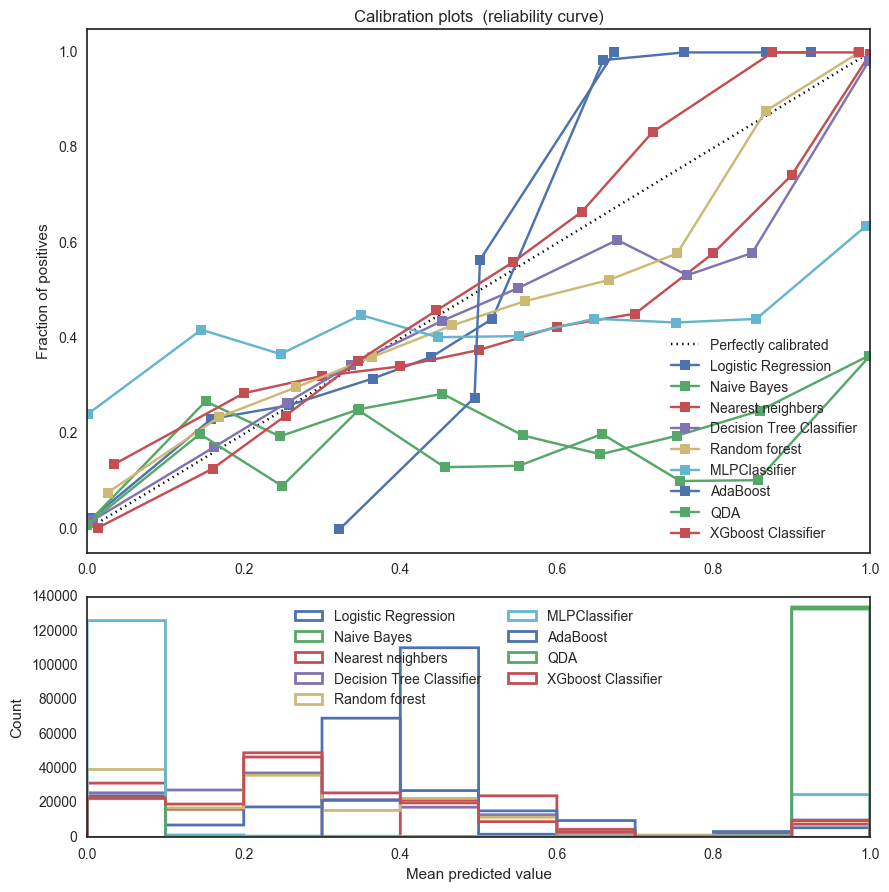

In [49]:
import numpy as np
np.random.seed(0)

import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, log_loss)
from sklearn.cross_validation import train_test_split



train_samples = 100000 # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]



# <!-- collapse=True -->
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in classifiers:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()


* LogisticRegression returns well calibrated predictions by default as it directly optimizes log-loss. In contrast, the other methods return biased probabilities; with different biases per method .
* Naive Bayes (GaussianNB) and tends to push probabilties to 0 or 1 (note the counts in the histograms). This is mainly because it makes the assumption that features are conditionally independent given the class, which is not the case in this dataset . KNN and QDA  and MLPClassifier has the worst claibration.
* RandomForestClassifier and Decision Tree and xgboost shows it is well calibrated with the graph.

However we can improve the graph using Isotonic Regression and Platt Scaling (called Sigmoid) 





### Cost and Profit Analysis :
Ultimately these statistical decisions must be translated into profit consideration for the bank. Let us assume that a correct decision of the bank would result in 35% profit at the end of 5 years. A correct decision here means that the bank predicts an application to be good or credit-worthy and it actually turns out to be credit worthy. When the opposite is true, i.e. bank predicts the application to be good but it turns out to be bad credit, then the loss is 100%. If the bank predicts an application to be non-creditworthy, then loan facility is not extended to that applicant and bank does not incur any loss (opportunity loss is not considered here).

Out of 1000 applicants, 70% are creditworthy. A loan manager without any model would incur [0.7*0.35 + 0.3 (-1)] = - 0.055 or 0.055 unit loss. If the average loan amount is 3200 DM (approximately), then the total loss will be 1760000 DM and per applicant loss is 176 DM.

Tree-based classification and random forest show a per unit profit; other methods are not doing well.

### Conclusion :
The basic purpose of the study contains credit risk modelling with machine learning algorithm. basically we have tried to establish a solid comparison between different classification algorithm and and improve the accuracy of the prediction by increasing accuracy and minimizing errors , bias and varience. As A result we got random forest as the best performing model and QDA is the worst . However due to Hardware resource limitation we have failed to test lot of machine learning algorithm with large amount of data. May be if we incorporate better learning algorithm and better and improved data cleaning and collection and handling missing values properly the result would have been different .However We will try to improve this process before moving into live production environement.

### Acknowledgement :
My heartiest thanks to my mentor Vivek For his insightful  guidance to help this project to be resourceful . I would surely acknowledge his mentoring and expertise in data science and I wish the knowledge imparted upon me and that  will be a great asset for my upcoming career and professional life. His way of explanation makes lot of difficult things very easy for me to understand and accomplish my task . I also thank to Springboard team for the nice course materials and appreciate their effort to build a great learning platform .


### Reference :
1. Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E. : Scikit-learn: Machine Learning in Python ,Journal of Machine Learning Research, volume= 12 , pages= 2825--2830, year=2011
2. Probability Calibration : https://jmetzen.github.io/2015-04-14/calibration.html
3. German Credit Data Analysis : https://onlinecourses.science.psu.edu/stat857/node/215
4. Andreas C. Müller, Sarah Guido : Introduction to Machine Learning with Python ,classification and Regression pages 39--57